<a href="https://colab.research.google.com/github/ain3ko/AppleAnalysis/blob/main/AppleAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

In [ ]:
import pyspark as dia
import numpy as kamu
import pandas as aku

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

In [ ]:
import kagglehub
from pyspark.sql import SparkSession

path = kagglehub.dataset_download("nelgiriyewithana/apple-quality")
print("Path to dataset files:", path)

spark = SparkSession.builder \
    .appName("Apple Quality Analysis") \
    .getOrCreate()

file_path = f"{path}/apple_quality.csv"
apple = spark.read.csv(file_path, header=True, inferSchema=True)

Path to dataset files: /root/.cache/kagglehub/datasets/nelgiriyewithana/apple-quality/versions/1


# **Soal Ujian**

1. **Berdasarkan apa yang sudah Anda pelajari, silahkan gunakan kemampuan anda untuk menyelesaikan sebuah menggunakan classification yang melibatkan penggunaan Machine Learning. (SCPMK 1534113, 50 Poin)** <br>
    a. Pilih satu bidang yang Anda beserta rekan tim minati, jabarkan alasan pemilihan bidang tersebut dan jelaskan apa yang ingin dicapai dengan memilih topik ini. <br>
    b. Ceritakan proses mendapatkan data dan informasi lengkap mengenai data tersebut (seperti waktu, penjelasan setiap kolom, sumber dll). Data yang digunakan harus data terbaru dengan range 1-4 tahun kebelakang. <br>
    c. Lakukan pre-processing data dengan memeriksa tipe data, mengganti nama kolom, memeriksa nilai null, mengubah tipe data (agar bisa di proses), menampilkan summary, dan menampilkan matriks korelasinya menggunakan metode metode yang pernah dipelajari. <br>
    d. Gunakan exploratory data analysis (EDA) untuk melihat sudut padang yang ada mengenai data (minimal 4) dua diantaranya bar dan pie chart, 2 diantaranya bebas. Berikan penjelasan. <br>
    e. Berdasarkan analisis data tersebut, jelaskan alasan pemilihan kolom/fitur yang relevan untuk menyelesaikan permasalahan yang ingin dicapai. <br>

In [ ]:
apple.printSchema()

root
 |-- A_id: integer (nullable = true)
 |-- Size: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Sweetness: double (nullable = true)
 |-- Crunchiness: double (nullable = true)
 |-- Juiciness: double (nullable = true)
 |-- Ripeness: double (nullable = true)
 |-- Acidity: string (nullable = true)
 |-- Quality: string (nullable = true)



In [ ]:
from pyspark.sql.functions import col

apple = apple.withColumnRenamed("A_id", "id")
apple = apple.withColumnRenamed("Size", "Ukuran")
apple = apple.withColumnRenamed("Weight", "Bobot")
apple = apple.withColumnRenamed("Sweetness", "Kemanisan")
apple = apple.withColumnRenamed("Crunchiness", "Kerenyahan")
apple = apple.withColumnRenamed("Juiciness", "Juicy")
apple = apple.withColumnRenamed("Ripeness", "Kematangan")
apple = apple.withColumnRenamed("Acidity", "Keasaman")

apple.printSchema()

root
 |-- id: integer (nullable = true)
 |-- Ukuran: double (nullable = true)
 |-- Bobot: double (nullable = true)
 |-- Kemanisan: double (nullable = true)
 |-- Kerenyahan: double (nullable = true)
 |-- Juicy: double (nullable = true)
 |-- Kematangan: double (nullable = true)
 |-- Keasaman: string (nullable = true)
 |-- Quality: string (nullable = true)



In [ ]:
apple.describe().show()

+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+--------------------+-------+
|summary|                id|             Ukuran|              Bobot|           Kemanisan|        Kerenyahan|             Juicy|        Kematangan|            Keasaman|Quality|
+-------+------------------+-------------------+-------------------+--------------------+------------------+------------------+------------------+--------------------+-------+
|  count|              4000|               4000|               4000|                4000|              4000|              4000|              4000|                4001|   4000|
|   mean|            1999.5|-0.5030146298267509|-0.9895465445945022|-0.47047851978824984| 0.985477903858501|0.5121179684932494|0.4982774280305005| 0.07687729571600004|   NULL|
| stddev|1154.8448669265786|   1.92805868885498| 1.6025072141517547|  1.9434406589204516|1.4027572042119638|1.9302856730

In [ ]:
from pyspark.sql.functions import col, sum, when

missing_values = apple.select(
    *[sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in apple.columns]
)

print("Missing values per column:")
missing_values.show()

Missing values per column:
+---+------+-----+---------+----------+-----+----------+--------+-------+
| id|Ukuran|Bobot|Kemanisan|Kerenyahan|Juicy|Kematangan|Keasaman|Quality|
+---+------+-----+---------+----------+-----+----------+--------+-------+
|  1|     1|    1|        1|         1|    1|         1|       0|      1|
+---+------+-----+---------+----------+-----+----------+--------+-------+



In [ ]:
from pyspark.sql.functions import mean, when, isnull

for col_name in ['id', 'Ukuran', 'Bobot', 'Kemanisan', 'Kerenyahan', 'Juicy', 'Kematangan', 'Keasaman', 'Quality']:
    mean_value = apple.select(mean(when(~isnull(col(col_name)), col(col_name)))).collect()[0][0]

    apple = apple.fillna({col_name: mean_value if mean_value is not None else 0})

In [ ]:
from pyspark.sql.functions import col, sum, when

missing_values = apple.select(
    *[sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in apple.columns]
)

print("Missing values per column:")
missing_values.show()

Missing values per column:
+---+------+-----+---------+----------+-----+----------+--------+-------+
| id|Ukuran|Bobot|Kemanisan|Kerenyahan|Juicy|Kematangan|Keasaman|Quality|
+---+------+-----+---------+----------+-----+----------+--------+-------+
|  0|     0|    0|        0|         0|    0|         0|       0|      0|
+---+------+-----+---------+----------+-----+----------+--------+-------+



In [ ]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Ukuran', 'Bobot', 'Kemanisan', 'Kerenyahan', 'Juicy', 'Kematangan', 'Keasaman', 'Quality']
apple_numeric = apple.select([col(c) for c in numeric_columns])

apple_enak = apple_numeric.toPandas()

apple_enak = apple_enak.apply(aku.to_numeric, errors='coerce')
apple_enak = apple_enak.dropna(axis=1)

correlation_matrix = apple_enak.corr()

# Cetak correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Ukuran     Bobot  Kemanisan  Kerenyahan     Juicy  Kematangan
Ukuran      1.000000 -0.170702  -0.324680    0.169868 -0.018892   -0.134773
Bobot      -0.170702  1.000000  -0.154246   -0.095882 -0.092263   -0.243824
Kemanisan  -0.324680 -0.154246   1.000000   -0.037552  0.095882   -0.273800
Kerenyahan  0.169868 -0.095882  -0.037552    1.000000 -0.259607   -0.201982
Juicy      -0.018892 -0.092263   0.095882   -0.259607  1.000000   -0.097144
Kematangan -0.134773 -0.243824  -0.273800   -0.201982 -0.097144    1.000000


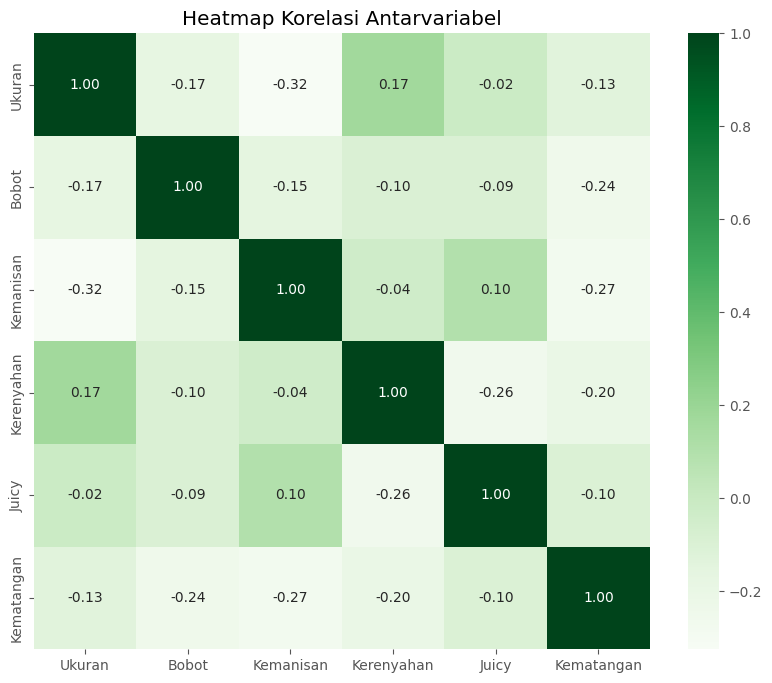

In [ ]:
#Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="Greens",
    fmt=".2f",
    square=True,
    cbar=True
)
plt.title("Heatmap Korelasi Antarvariabel")
plt.show()

In [ ]:
apple = apple.withColumn(
    "Quality",
    when(col("Quality") == "0", None).otherwise(col("Quality"))
)

In [ ]:
apple = apple.filter(apple["Quality"].isNotNull())

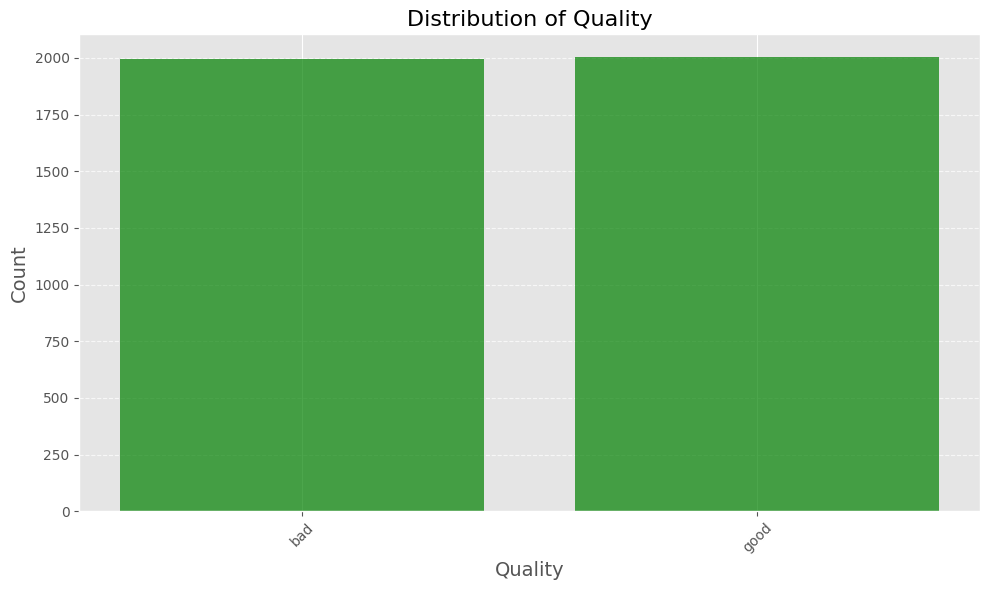

In [ ]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

quality_distribution = apple.groupBy("Quality").agg(count("*").alias("count"))
quality_distribution_pd = quality_distribution.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(
    quality_distribution_pd["Quality"],
    quality_distribution_pd["count"],
    color='green',
    alpha=0.7
)
plt.title("Distribution of Quality", fontsize=16)
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

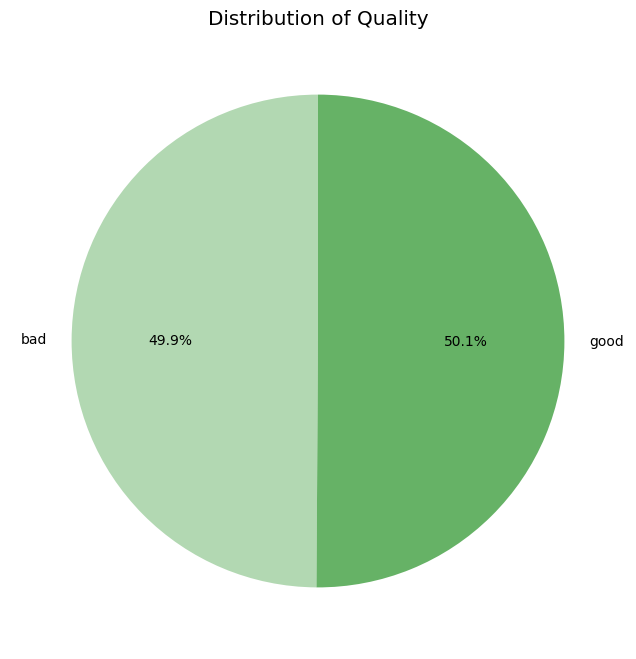

In [ ]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

quality_distribution = apple.groupBy("Quality").agg(count("*").alias("count"))

quality_distribution_pd = quality_distribution.toPandas()

colors = ['#b2d8b2', '#66b266', '#339933', '#006600', '#004d00']

plt.figure(figsize=(8, 8))
plt.pie(
    quality_distribution_pd["count"],
    labels=quality_distribution_pd["Quality"],
    autopct="%1.1f%%",
    startangle=90,
    colors=colors
)
plt.title("Distribution of Quality")
plt.show()

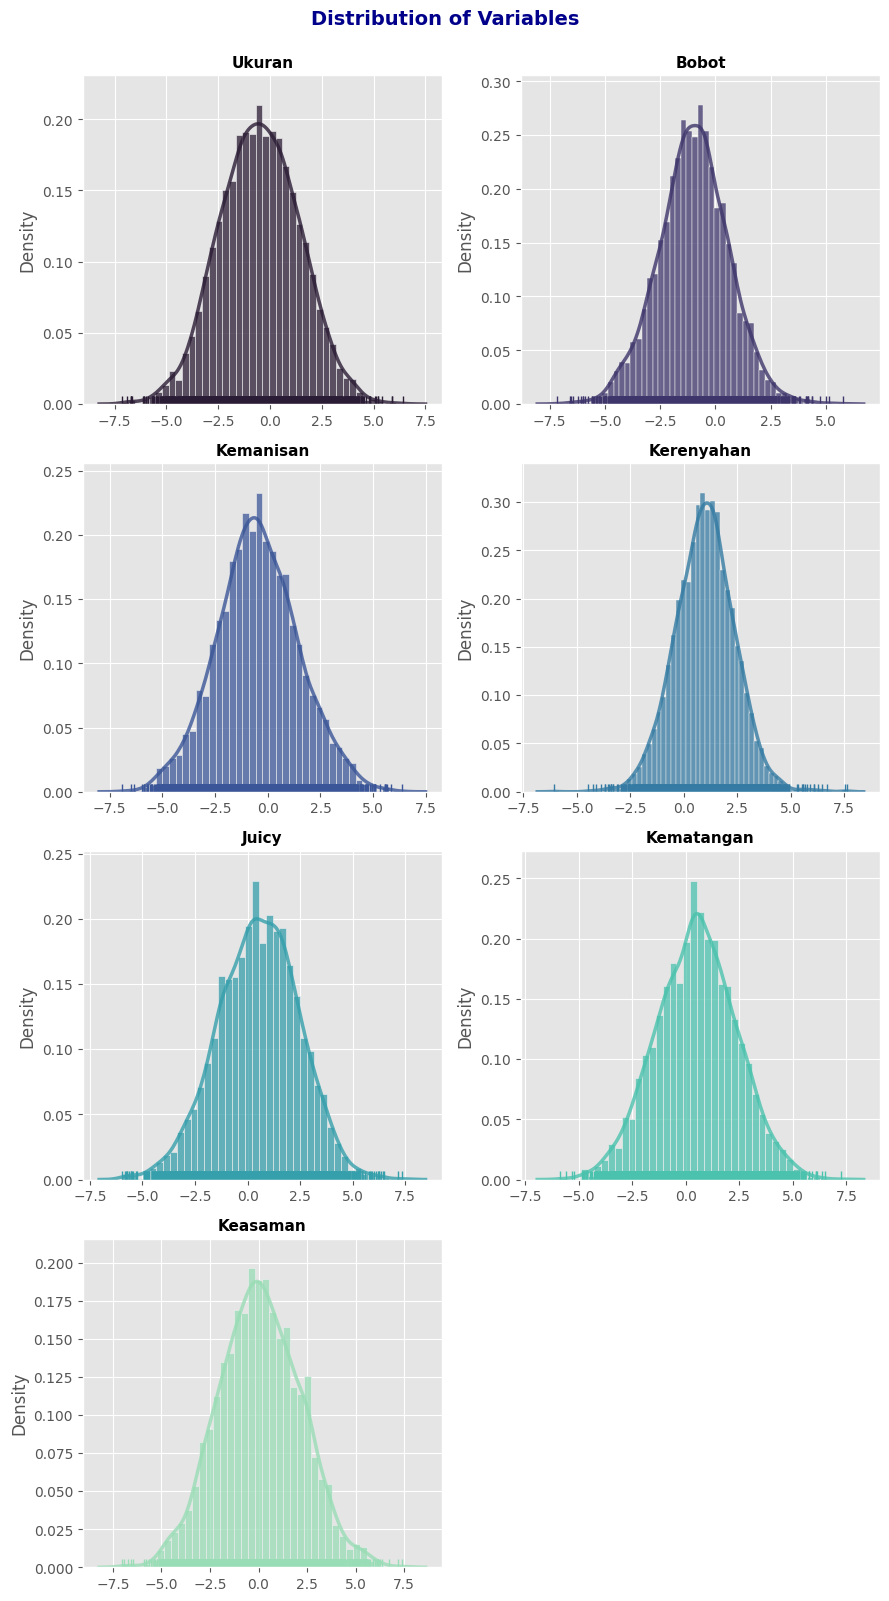

In [ ]:
data = apple.toPandas()

cols = data.columns[:-1]
numeric_cols = [col for col in cols if col not in ['id', 'Quality']]

for col in numeric_cols:
    data[col] = aku.to_numeric(data[col], errors='coerce')

data = data.dropna(subset=numeric_cols)

colors = sns.color_palette('mako', len(numeric_cols))

num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2
fig, axs = plt.subplots(nrows=num_rows, ncols=2, figsize=(9, num_rows * 4))
plt.style.use("ggplot")
axs = axs.flat

#visualisasi untuk setiap kolom numerik
for i, col in enumerate(numeric_cols):
    sns.kdeplot(data, x=col, alpha=0.8, linewidth=2.5, color=colors[i], ax=axs[i])
    sns.histplot(data, x=col, stat='density', color=colors[i], ax=axs[i])
    sns.rugplot(data, x=col, color=colors[i], ax=axs[i])
    axs[i].set_xlabel("")
    axs[i].set_title(col, fontsize=11, fontweight="bold", color="black")

fig.suptitle("Distribution of Variables", fontsize=14, fontweight="bold", color="darkblue", y=0.998)

if num_cols < len(axs):
    for j in range(num_cols, len(axs)):
        fig.delaxes(ax=axs[j])

fig.tight_layout()
plt.show()

2. **Pengembangan model machine learning**. <br>
    a. Gunakan minimal 4 model Machine Learning dari library Spark untuk menyelesaikan masalah yang Anda pilih. 2 Model sesuai dengan instruksi (Random Forest, Gradient Boost Tree) dan dua model lain bebas (belum pernah dibahas). Lalu bandingkan hasilnya menggunakan matriks seperti AUC (ROC Curve), Akurasi, F1 Score, Presisi, dan Recall. <br>
    b. Dari ke-4 model classification tersebut, pilih dua model dengan performa terbaik dan lakukan hyperparameter tuning untuk melihat perubahan performa yang dihasilkan. Lalu tentukan model terbaik yang bisa menjadi solusi pada masalah yang Anda terapkan di awal.<br>
    c. Jabarkan karakteristik model terbaik yang Anda dapatkan terhadap korelasinya dengan data. Apakah ada sifat tertentu dari data yang ternyata cocok dengan model dan sebaliknya? <br>


## **Logistic Reggression**

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import mean, when, isnull

In [ ]:
# Preprocessing Data
label_indexer = StringIndexer(inputCol="Quality", outputCol="label")
data = label_indexer.fit(apple).transform(apple)
data = data.withColumn("Keasaman", data["Keasaman"].cast(DoubleType()))

In [ ]:
#Feature
feature_cols = [col for col in apple.columns if col != "Quality"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
data = assembler.transform(data)

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
#Latih Model
lr = LogisticRegression(featuresCol="features", labelCol="label", maxIter=10)
model = lr.fit(train_data)

predictions = model.transform(test_data)

In [ ]:
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score = evaluator_f1.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision"
)
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)
recall = evaluator_recall.evaluate(predictions)

In [ ]:
#matrix
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions.createOrReplaceTempView("predictions_table")
conf_matrix = spark.sql(
    """SELECT
        prediction,
        label,
        COUNT(*) as count
    FROM predictions_table
    GROUP BY prediction, label
    ORDER BY label, prediction""")
conf_matrix.show()

+----------+-----+-----+
|prediction|label|count|
+----------+-----+-----+
|       0.0|  0.0|  272|
|       1.0|  0.0|   96|
|       0.0|  1.0|  100|
|       1.0|  1.0|  274|
+----------+-----+-----+



In [ ]:
# Menampilkan hasil evaluasi
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.74
F1 Score: 0.74
Precision: 0.74
Recall: 0.74


## **Random Forest**

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.ml.feature import Imputer

In [ ]:
# Mengubah data string ke double di keasaman
apple = apple.withColumn("Keasaman", col("Keasaman").cast("double"))

# berjaga-jaga apabila ada data kosong
imputer = Imputer(inputCols=["Keasaman"], outputCols=["Keasaman_imputed"])
apple = imputer.fit(apple).transform(apple)
apple = apple.drop("Keasaman")
apple = apple.withColumnRenamed("Keasaman_imputed", "Keasaman")

In [ ]:
# Feature
assembler = VectorAssembler(inputCols=['Ukuran', 'Bobot', 'Kemanisan', 'Kerenyahan', 'Juicy', 'Kematangan', 'Keasaman'], outputCol='features')
indexer = StringIndexer(inputCol='Quality', outputCol='label', handleInvalid="keep") # Add handleInvalid="keep"

# Split Data
(trainingData, testData) = apple.randomSplit([0.8, 0.2])

# Random Forest Klasifikasi
rf = RandomForestClassifier(labelCol='label', featuresCol='features')

# Buat Pipeline
pipeline = Pipeline(stages=[assembler, indexer, rf])

# Train Model
model = pipeline.fit(trainingData)

# Buat Prediksi
predictions = model.transform(testData)

In [ ]:
evaluator_roc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
evaluator_pre = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
evaluator_rec = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")

auc = evaluator_roc.evaluate(predictions)
accuracy = evaluator_acc.evaluate(predictions)
f1 = evaluator_f1.evaluate(predictions)
precision = evaluator_pre.evaluate(predictions)
recall = evaluator_rec.evaluate(predictions)

In [ ]:
#hasil
print(f"AUC : {auc}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

AUC : 0.8271144278606966
Accuracy: 0.8271144278606966
F1 Score: 0.8266446118616915
Precision: 0.8289871415356007
Recall: 0.8271144278606966


## **Decision Tree**

In [ ]:
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, DoubleType
from pyspark.sql.functions import mean, when, isnull

In [ ]:
# Preprocessing Data
label_indexer = StringIndexer(inputCol="Quality", outputCol="label")
data = label_indexer.fit(apple).transform(apple)
data = data.withColumn("Keasaman", data["Keasaman"].cast(DoubleType()))

In [ ]:
# Feature
feature_cols = [col for col in apple.columns if col != "Quality"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
data = assembler.transform(data)

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(featuresCol="features", labelCol="label")
model = dt.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

In [ ]:
# Evaluate the model
evaluator_accuracy = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy"
)
accuracy = evaluator_accuracy.evaluate(predictions)

evaluator_f1 = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="f1"
)
f1_score = evaluator_f1.evaluate(predictions)

evaluator_precision = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedPrecision"
)
precision = evaluator_precision.evaluate(predictions)

evaluator_recall = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="weightedRecall"
)
recall = evaluator_recall.evaluate(predictions)

In [ ]:
# Confusion Matrix
predictions.createOrReplaceTempView("predictions_table")
conf_matrix = spark.sql("""
    SELECT
        prediction,
        label,
        COUNT(*) as count
    FROM predictions_table
    GROUP BY prediction, label
    ORDER BY label, prediction
""")
conf_matrix.show()

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

+----------+-----+-----+
|prediction|label|count|
+----------+-----+-----+
|       0.0|  0.0|  257|
|       1.0|  0.0|  111|
|       0.0|  1.0|   66|
|       1.0|  1.0|  308|
+----------+-----+-----+

Accuracy: 0.76
F1 Score: 0.76
Precision: 0.77
Recall: 0.76


## **Gradient-Boost Tree**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, roc_auc_score,
    roc_curve, f1_score, precision_score, recall_score
)
import matplotlib.pyplot as plt

In [ ]:
apple_pd = apple.toPandas()

X = apple_pd.drop(columns=['Quality', 'id'])
y = apple_pd['Quality']

for col in X.columns:
    X[col] = aku.to_numeric(X[col], errors='coerce')

X = X.dropna()
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         bad       0.87      0.87      0.87       401
        good       0.87      0.87      0.87       399

    accuracy                           0.87       800
   macro avg       0.87      0.87      0.87       800
weighted avg       0.87      0.87      0.87       800



In [ ]:
print(f"Akurasi: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Presisi: {precision}")
print(f"Recall: {recall}")

Akurasi: 0.87
F1 Score: 0.87
Presisi: 0.87
Recall: 0.87


**Hyper Tuning**

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Hyperparameter Tuning for Random Forest
paramGrid_rf = (ParamGridBuilder()
             .addGrid(rf.numTrees, [10, 50, 100])
             .addGrid(rf.maxDepth, [5, 10, 15])
             .build())

crossval_rf = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid_rf,
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                          numFolds=3)

cvModel_rf = crossval_rf.fit(trainingData)
bestModel_rf = cvModel_rf.bestModel
predictions_rf = bestModel_rf.transform(testData)

# Evaluasi Model terbaik Random Forest
evaluator_rf = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_rf = evaluator_rf.evaluate(predictions_rf)

print(f"Best Random Forest - Accuracy: {accuracy_rf}")

Best Random Forest - Accuracy: 0.8980099502487562


In [ ]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier(labelCol="label", featuresCol="features")
pipeline_gbt = Pipeline(stages=[assembler, indexer, gbt])

paramGrid_gbt = (ParamGridBuilder()
             .addGrid(gbt.maxDepth, [2, 5, 10])
             .addGrid(gbt.maxIter, [10, 20, 50])
             .build())


crossval_gbt = CrossValidator(estimator=pipeline_gbt,
                          estimatorParamMaps=paramGrid_gbt,
                          evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                          numFolds=3)

cvModel_gbt = crossval_gbt.fit(trainingData)
bestModel_gbt = cvModel_gbt.bestModel
predictions_gbt = bestModel_gbt.transform(testData)

# Evaluasi terbaik GBT
evaluator_gbt = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy_gbt = evaluator_gbt.evaluate(predictions_gbt)

print(f"Best Gradient-Boosted Tree - Accuracy: {accuracy_gbt}")

Best Gradient-Boosted Tree - Accuracy: 0.8669154228855721
